# Setup

In [2]:
# Data-handling imports
import pandas as pd

# Text-handling imports
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Graphing libraries
import matplotlib.pyplot as plt

# Random seed
seed = 5993

In [3]:
# Run this once to download VADER lexicon
# import nltk
# nltk.download('vader_lexicon')

# Data import & cleaning

In [4]:
# Read in data
df = pd.read_csv("../data/COVID.csv")

In [5]:
cities = ["Boston", "New York"]
regexes = ["^Boston", "^(?:NYC|New York|Bronx|Manhattan|Brookyn|Queens|Staten Island)"]

dfs = {}
for city, regex in zip(cities, regexes):
    # Create data frame
    dfs[city] = pd.DataFrame()
    
    # Subset original data
    mask = df["Tweet Location"].str.contains(regex, na=False)
    
    # Add columns
    dfs[city]["id"] = df[mask]["Tweet Id"]
    dfs[city]["text"] = df[mask]["Tweet Content"]
    dfs[city]["city"] = city
    dfs[city]["time"] = pd.to_datetime(df[mask]["Tweet Posted Time (UTC)"])
    
    #dfs[city].set_index("id", inplace=True)

# Compile dataframe with text
covid = pd.concat(dfs).reset_index(drop=True)
covid.set_index("id", inplace=True)

In [6]:
# Check if we're balanced across cities
covid["city"].value_counts(normalize=True) * 100

New York    83.467279
Boston      16.532721
Name: city, dtype: float64

# Sentiment analysis

In [7]:
# Instantiate sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiments
sentiments = pd.DataFrame([analyzer.polarity_scores(text) for text in covid["text"]])

# Append to original data frame
covid = pd.concat([covid, sentiments.set_index(covid.index)], axis=1)

# Graphs

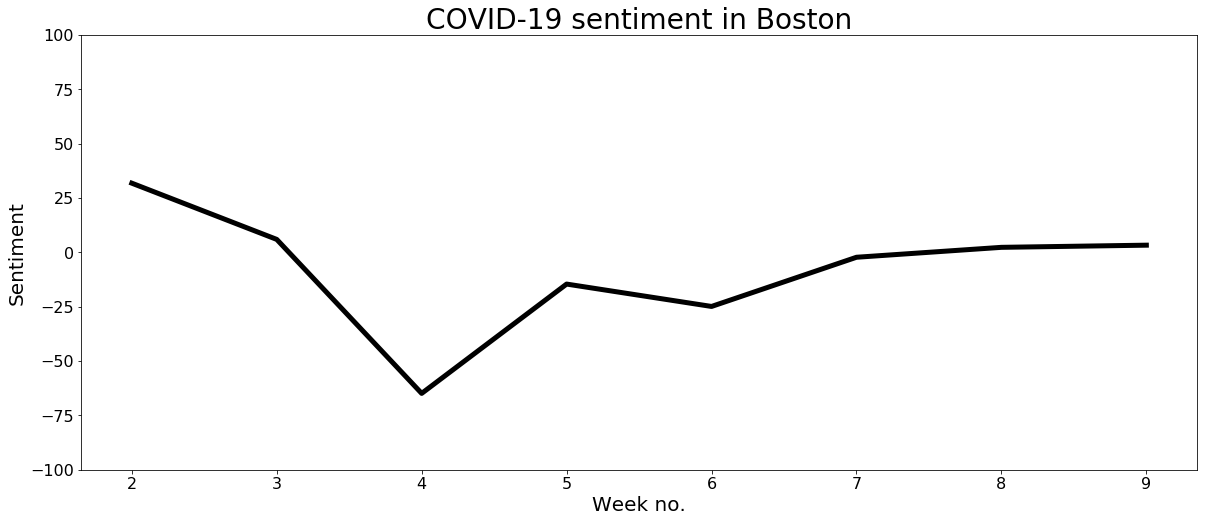

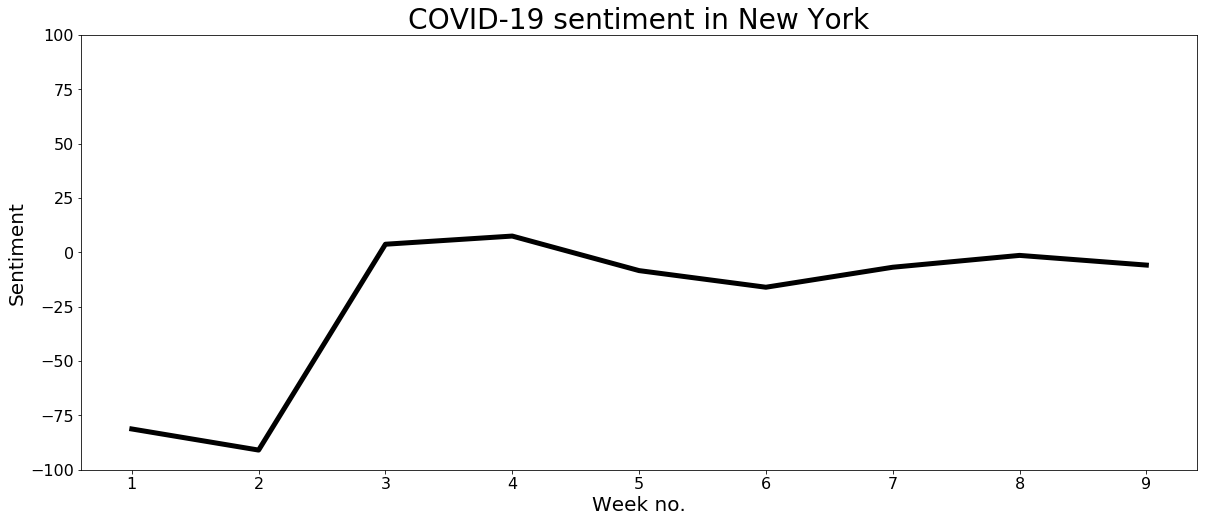

In [13]:
for city in cities:
    subset = covid[covid["city"] == city]
    subset_mean = subset.groupby(subset["time"].dt.week).mean()

    # Matplotlib setup
    plt.figure(figsize=(20, 8))
    plt.title(f"COVID-19 sentiment in {city}", fontsize=28)
    plt.xlabel("Week no.", fontsize=20)
    plt.ylabel("Sentiment", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    plt.ylim((-100, 100))
    plt.plot(subset_mean.index, subset_mean["compound"] * 100, color="black", linewidth=5);

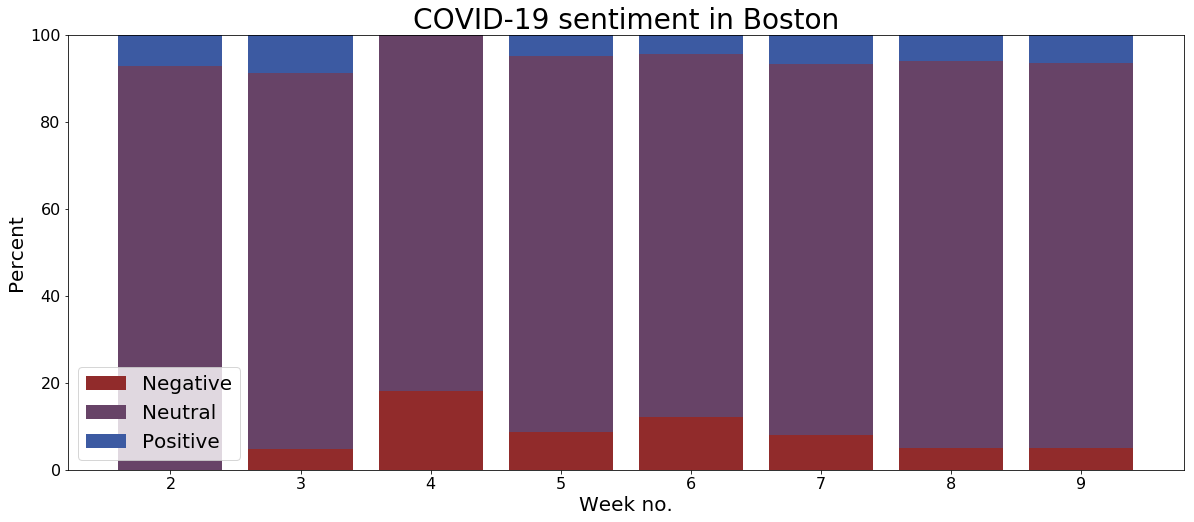

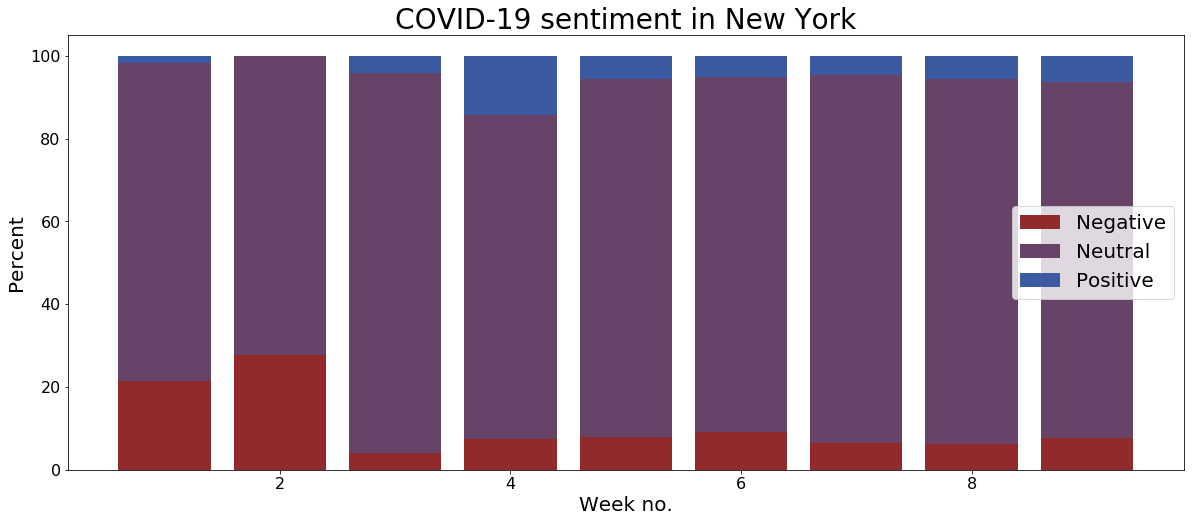

In [11]:
for city in cities:
    subset = covid[covid["city"] == city]
    subset_mean = subset.groupby(subset["time"].dt.week).mean()

    # Matplotlib setup
    plt.figure(figsize=(20, 8))
    plt.title(f"COVID-19 sentiment in {city}", fontsize=28)
    plt.xlabel("Week no.", fontsize=20)
    plt.ylabel("Percent", fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # Stacked bar plot
    plt.bar(subset_mean.index, subset_mean["neg"] * 100, color="#912B2B", linewidth=5, label="Negative");
    plt.bar(subset_mean.index, subset_mean["neu"] * 100, color="#674367", linewidth=5, label="Neutral",  bottom=subset_mean["neg"] * 100);
    plt.bar(subset_mean.index, subset_mean["pos"] * 100, color="#3C5AA2", linewidth=5, label="Positive", bottom=(subset_mean["neg"] + subset_mean["neu"]) * 100);

    plt.legend(fontsize=20);

# Data export